## Load Data and Initial Grid Search

In [2]:
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'
HANNAH = ''
ZIXUN = ''

ROOT_DIR = YASH
os.chdir(ROOT_DIR + 'testing-framework/')

DATA_NAME = 'toy-agriVision-red-fourier'
GROUP = 'band'
SKIP_OPTIMIZE_STEP = True
CONSTANT_SAMPLE_SIZE = float('inf')
MIN_GROUP, MAX_GROUP = 2, 14 
# Should be 2, (8 or 9) if wavelet; 2, 14 if fourier. 
# Inspect data_df and decide based on minimum and maximum values of layers/bands
# Discard Layer 1 / Band 1

''' Only need to run commented code (3 lines) below once'''
# os.mkdir(DATA_NAME)
# os.mkdir(os.path.join(DATA_NAME, "CSVs"))
# os.mkdir(os.path.join(DATA_NAME, "plots"))

' Only need to run commented code (3 lines) below once'

In [3]:
from utilities import *
from plot_utilities import *

''' Uncomment if you need to compute prior CDFs or PDFs using MATLAB'''
# import matlab.engine 
# eng = matlab.engine.connect_matlab()

data_df = pd.read_pickle(f'../transformed-data/{DATA_NAME}.pickle')
data_df[GROUP].apply([min, max])

min     1
max    14
Name: band, dtype: int64

In [57]:
stats.ks_2samp(all_cdfs[()], sample_prior(0.1533, 0.3, 100000))

KstestResult(statistic=0.03364595848595853, pvalue=7.369439860436647e-21, statistic_location=68.92285969883787, statistic_sign=1)

In [4]:
''' Only need to run commented code (6 lines) below once'''
min_group, max_group = MIN_GROUP, MAX_GROUP
group_data_map = dict()
for group in np.arange(min_group, max_group + 1):
    data = data_df[(data_df[GROUP] == group)]['data'].iloc[0]
    group_data_map[group] = np.sort(data) # [np.unique(np.round(np.linspace(0, data.size - 1, min(CONSTANT_SAMPLE_SIZE, data.size))).astype(int))] 
pd.to_pickle(group_data_map, f'{DATA_NAME}/group_data_map.pickle')

group_data_map = pd.read_pickle(f'{DATA_NAME}/group_data_map.pickle')
group_data_map

{2: array([-494226.08474215, -388960.69971248, -388153.04426583, ...,
         391956.45465078,  405316.04378629,  423788.6075931 ]),
 3: array([-507265.09178781, -438784.66147536, -423047.86345346, ...,
         361737.07875571,  378682.900842  ,  390989.99969576]),
 4: array([-372791.51028522, -334486.65314733, -299398.60800867, ...,
         303039.02530317,  310933.38249675,  681981.21897768]),
 5: array([-366962.4146411 , -258275.20067919, -197920.77740005, ...,
         217673.33080024,  232628.51860868,  250822.30814853]),
 6: array([-222079.80537636, -204426.36714482, -176463.96682008, ...,
         180278.27445355,  199459.82191555,  257599.93136064]),
 7: array([-199745.299025  , -156564.10712149, -131367.58997019, ...,
         215145.6718816 ,  218315.71759555,  230791.97715714]),
 8: array([-183126.67823903, -108556.70403607,  -88191.07020578, ...,
         116888.47350721,  133293.65950467,  135553.65274312]),
 9: array([-108399.93151121,  -78017.29274993,  -75788.6912980

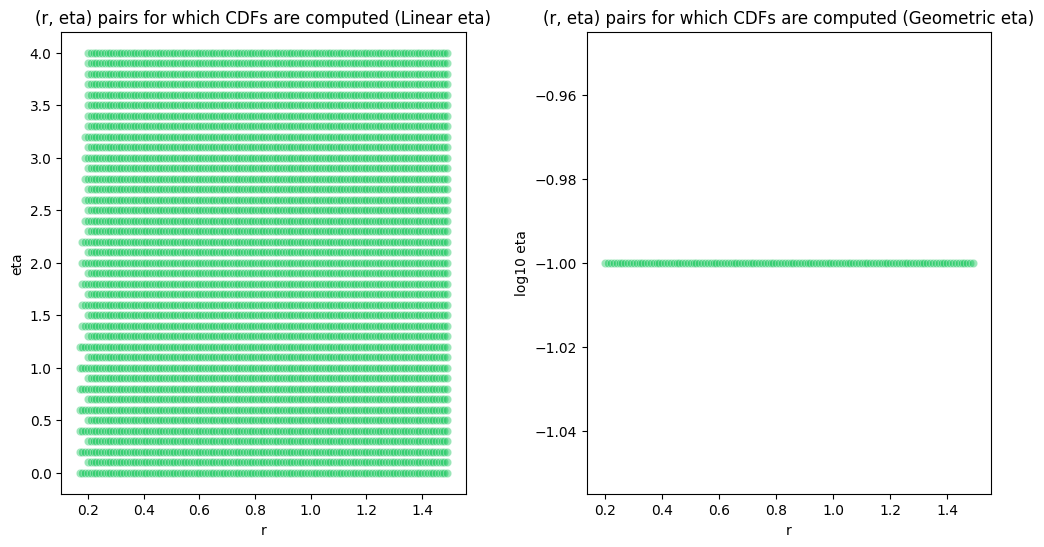

,"(r,eta),cdf",r,eta,cdf
0,"((0.17, 0), <scipy.interpolate._cubic.CubicSpl...",0.17,0.0,<scipy.interpolate._cubic.CubicSpline object a...
1,"((0.17, 0.2), <scipy.interpolate._cubic.CubicS...",0.17,0.2,<scipy.interpolate._cubic.CubicSpline object a...
2,"((0.17, 0.4), <scipy.interpolate._cubic.CubicS...",0.17,0.4,<scipy.interpolate._cubic.CubicSpline object a...
3,"((0.17, 0.6), <scipy.interpolate._cubic.CubicS...",0.17,0.6,<scipy.interpolate._cubic.CubicSpline object a...
4,"((0.17, 0.8), <scipy.interpolate._cubic.CubicS...",0.17,0.8,<scipy.interpolate._cubic.CubicSpline object a...
...,...,...,...,...
5361,"((1.49, 3.6), <scipy.interpolate._cubic.CubicS...",1.49,3.6,<scipy.interpolate._cubic.CubicSpline object a...
5362,"((1.49, 3.7), <scipy.interpolate._cubic.CubicS...",1.49,3.7,<scipy.interpolate._cubic.CubicSpline object a...
5363,"((1.49, 3.8), <scipy.interpolate._cubic.CubicS...",1.49,3.8,<scipy.interpolate._cubic.CubicSpline object a...
5364,"((1.49, 3.9), <scipy.interpolate._cubic.CubicS...",1.49,3.9,<scipy.interpolate._cubic.CubicSpline object a...


In [5]:
# Omitted scipy_10000 CDFs because all best-fit CDFs were around r = 0.2
all_cdfs = combine_pickles('mtlb_10000') | combine_pickles('mtlb_100000') # | combine_pickles('scipy_10000')
all_cdfs_df = pd.DataFrame({'(r,eta),cdf' : sorted(all_cdfs.items())})
all_cdfs_df['r'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[0])
all_cdfs_df['eta'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[1])
all_cdfs_df['cdf'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[1])

create_scatter_plots_log_eta(all_cdfs_df)

all_cdfs_df.sort_values(['r', 'eta'])

In [6]:
''' Only need to run commented code once'''

# master_df = pd.DataFrame(columns = [GROUP, 'num_samples', 'initial_param', 'kstest_stat_initial', 'best_param_eta_0', 'kstest_stat_eta0'])
# idx_eta0 = [i for i, param in enumerate(sorted(all_cdfs)) if np.isclose(param[1], 0, atol = 1e-40)]
# sorted_params = sorted(all_cdfs)
# for i, group in enumerate(np.arange(min_group, max_group+1)):
#     print("Processing group (layer/band) ", group)
#     sample = group_data_map[group]
#     ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs)
#     ksstats_eta0 = [ksstats[i] for i in idx_eta0]
#     idx_min_ksstats_eta0 = idx_eta0[np.argmin(ksstats_eta0)]
#     master_df.loc[i, :] = [group, sample.size, initial_param, min_stat, sorted_params[idx_min_ksstats_eta0], ksstats[idx_min_ksstats_eta0]]
# master_df = master_df.set_index(GROUP)
# master_df.to_csv(f'{DATA_NAME}/CSVs/initial_eta0_grid.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/initial_eta0_grid.csv', index_col=GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[group]['initial_param'][1:-1].split(',')) for group in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0
band,,,,,
2,26208,"(0.17, 1.2)",0.040712,"(0.17, 0)",0.235186
3,44352,"(0.17, 0.8)",0.038393,"(0.17, 0)",0.195514
4,80640,"(0.17, 0.6)",0.033889,"(0.17, 0)",0.163667
5,141120,"(0.17, 0.4)",0.029949,"(0.17, 0)",0.125488
6,258048,"(0.17, 0.4)",0.034730,"(0.17, 0)",0.097838
7,443520,"(0.17, 0.2)",0.027929,"(0.17, 0)",0.063644
8,838656,"(0.17, 0.0)",0.028738,"(0.17, 0)",0.028738
9,1505952,"(0.18, 0.2)",0.025234,"(0.17, 0)",0.026613
10,2735712,"(0.19, 0.4)",0.028875,"(0.18, 0)",0.033330


In [114]:
stats.ks_1samp(sample_prior(0.17,1,10000), all_cdfs[(0.17,1)])

KstestResult(statistic=0.011899349228489287, pvalue=0.11684561402484495, statistic_location=-2496.947236486752, statistic_sign=1)

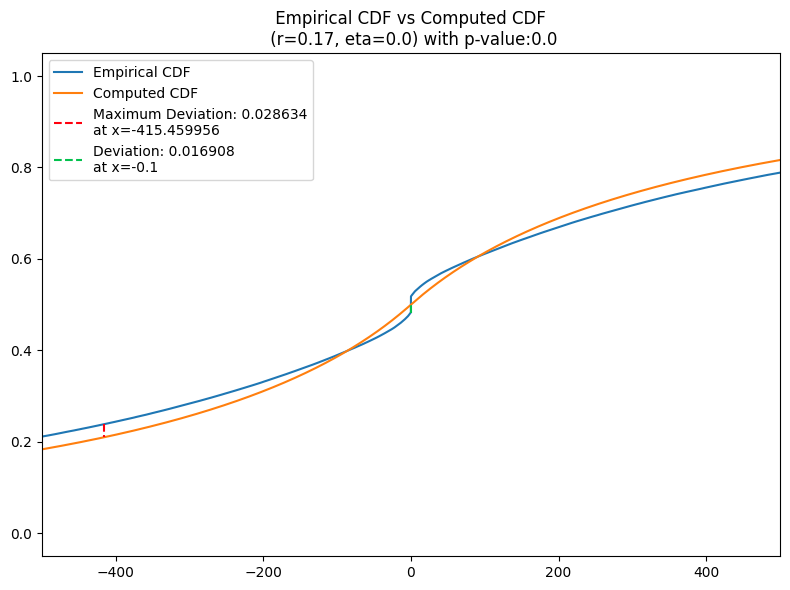

In [7]:
group = 8
visualize_cdf(group_data_map[group], 
              all_cdfs = all_cdfs, 
              params= master_df.loc[group, 'initial_param'], 
              n_samples=10000, interval = (-500, 500), 
              provided_loc = -0.1);

In [11]:
# Given that pvalue = 0.05 and I have n samples, what should the kstest statistic be?
# Note how as num_samples increases by a factor of 4, the cutoff decreases by a factor of 2
# Could potentially include the plot in `images/loglog_pvalue_numsamples.png` 

for group in np.arange(min_group, max_group+1):
    num_points = group_data_map[group].size
    master_df.loc[group, 'kstest_stat_cutoff_0.05'] = stats.kstwo(n=num_points).isf(0.05)    
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,kstest_stat_cutoff_0.05
band,,,,,,
2,26208,"(0.17, 1.2)",0.040712,"(0.17, 0)",0.235186,0.008383
3,44352,"(0.17, 0.8)",0.038393,"(0.17, 0)",0.195514,0.006445
4,80640,"(0.17, 0.6)",0.033889,"(0.17, 0)",0.163667,0.004780
5,141120,"(0.17, 0.4)",0.029949,"(0.17, 0)",0.125488,0.003614
6,258048,"(0.17, 0.4)",0.034730,"(0.17, 0)",0.097838,0.002673
7,443520,"(0.17, 0.2)",0.027929,"(0.17, 0)",0.063644,0.002039
8,838656,"(0.17, 0.0)",0.028738,"(0.17, 0)",0.028738,0.001483
9,1505952,"(0.18, 0.2)",0.025234,"(0.17, 0)",0.026613,0.001107
10,2735712,"(0.19, 0.4)",0.028875,"(0.18, 0)",0.033330,0.000821


In [22]:
r_d, eta_d = 3, 2 # Controls precision to which parameters are optimized
SKIP_OPTIMIZE_STEP = SKIP_OPTIMIZE_STEP

if SKIP_OPTIMIZE_STEP:
    r_d, eta_d = 2, 1
    master_df['kstest_stat_cd'] = master_df['kstest_stat_initial']
    master_df[f'best_r_d{r_d}'] = master_df['initial_param'].apply(lambda x : x[0])
    master_df[f'best_eta_d{eta_d}'] = master_df['initial_param'].apply(lambda x : x[1])

else:
    for group in np.arange(min_group, max_group+1): 
        sample = group_data_map[group]
        initial_param = master_df.loc[group, 'initial_param']
        master_df.loc[group, f'best_r_d{r_d}'], master_df.loc[group, f'best_eta_d{eta_d}'] = coord_descent_gengamma(sample, initial_param, 
                                                                                                                    r_depth = r_d, eta_depth=eta_d, 
                                                                                                                    scipy_int=False, group=group, 
                                                                                                                    eng=eng, DATA_NAME=DATA_NAME)
        master_df.loc[group, 'kstest_stat_cd'] = compute_ksstat(sample, combine_pickles(f'{DATA_NAME}_group{group}_10000')[(master_df.loc[group, f'best_r_d{r_d}'], master_df.loc[group, f'best_eta_d{eta_d}'])])
        print(f"{GROUP} {group} best parameters: {master_df.loc[group, 'kstest_stat_cd']}")


master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_cd'], row.loc['num_samples']), axis = 1)    
master_df[['num_samples', 'initial_param', 'kstest_stat_initial', f'best_r_d{r_d}', f'best_eta_d{eta_d}', 'kstest_stat_cd', 'n_pval_0.05']].to_csv(f'{DATA_NAME}/CSVs/optimized_params.csv')
master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv', index_col = GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[group]['initial_param'][1:-1].split(',')) for group in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,n_pval_0.05
band,,,,,,,,,,
2,26208,"(0.17, 1.2)",0.040712,"(0.17, 0)",0.235186,0.008383,0.040712,0.17,1.2,1164
3,44352,"(0.17, 0.8)",0.038393,"(0.17, 0)",0.195514,0.006445,0.038393,0.17,0.8,1314
4,80640,"(0.17, 0.6)",0.033889,"(0.17, 0)",0.163667,0.004780,0.033889,0.17,0.6,1593
5,141120,"(0.17, 0.4)",0.029949,"(0.17, 0)",0.125488,0.003614,0.029949,0.17,0.4,2089
6,258048,"(0.17, 0.4)",0.034730,"(0.17, 0)",0.097838,0.002673,0.034730,0.17,0.4,1512
7,443520,"(0.17, 0.2)",0.027929,"(0.17, 0)",0.063644,0.002039,0.027929,0.17,0.2,2464
8,838656,"(0.17, 0.0)",0.028738,"(0.17, 0)",0.028738,0.001483,0.028738,0.17,0.0,2329
9,1505952,"(0.18, 0.2)",0.025234,"(0.17, 0)",0.026613,0.001107,0.025234,0.18,0.2,2941
10,2735712,"(0.19, 0.4)",0.028875,"(0.18, 0)",0.033330,0.000821,0.028875,0.19,0.4,2251


## Comparing Empirical and Computed CDF/PDF

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:87: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


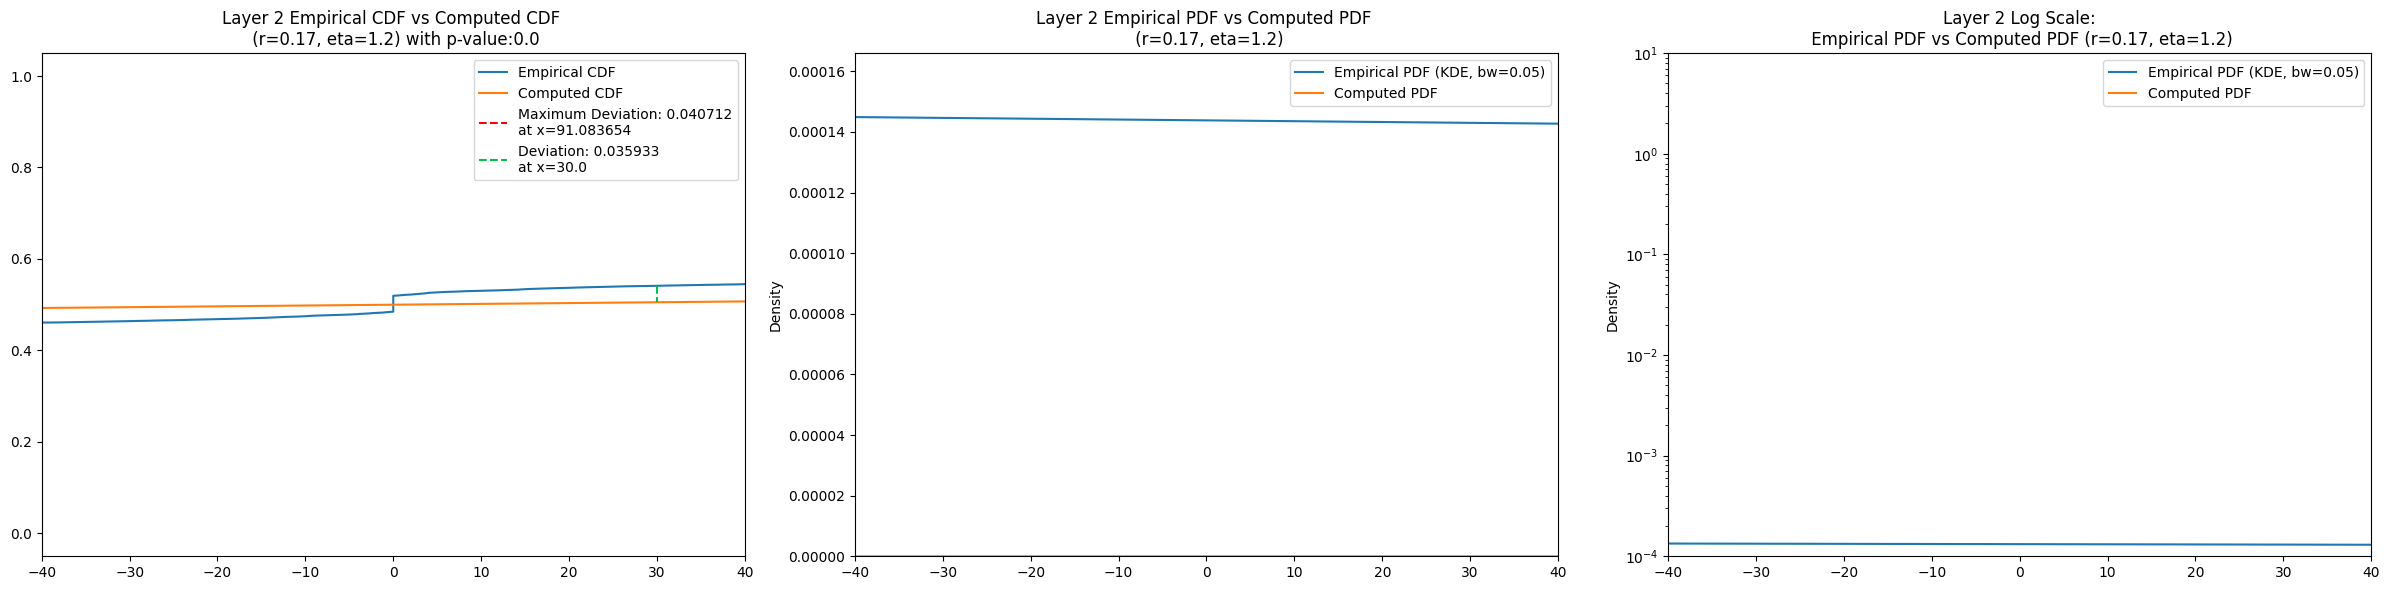

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:87: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:87: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


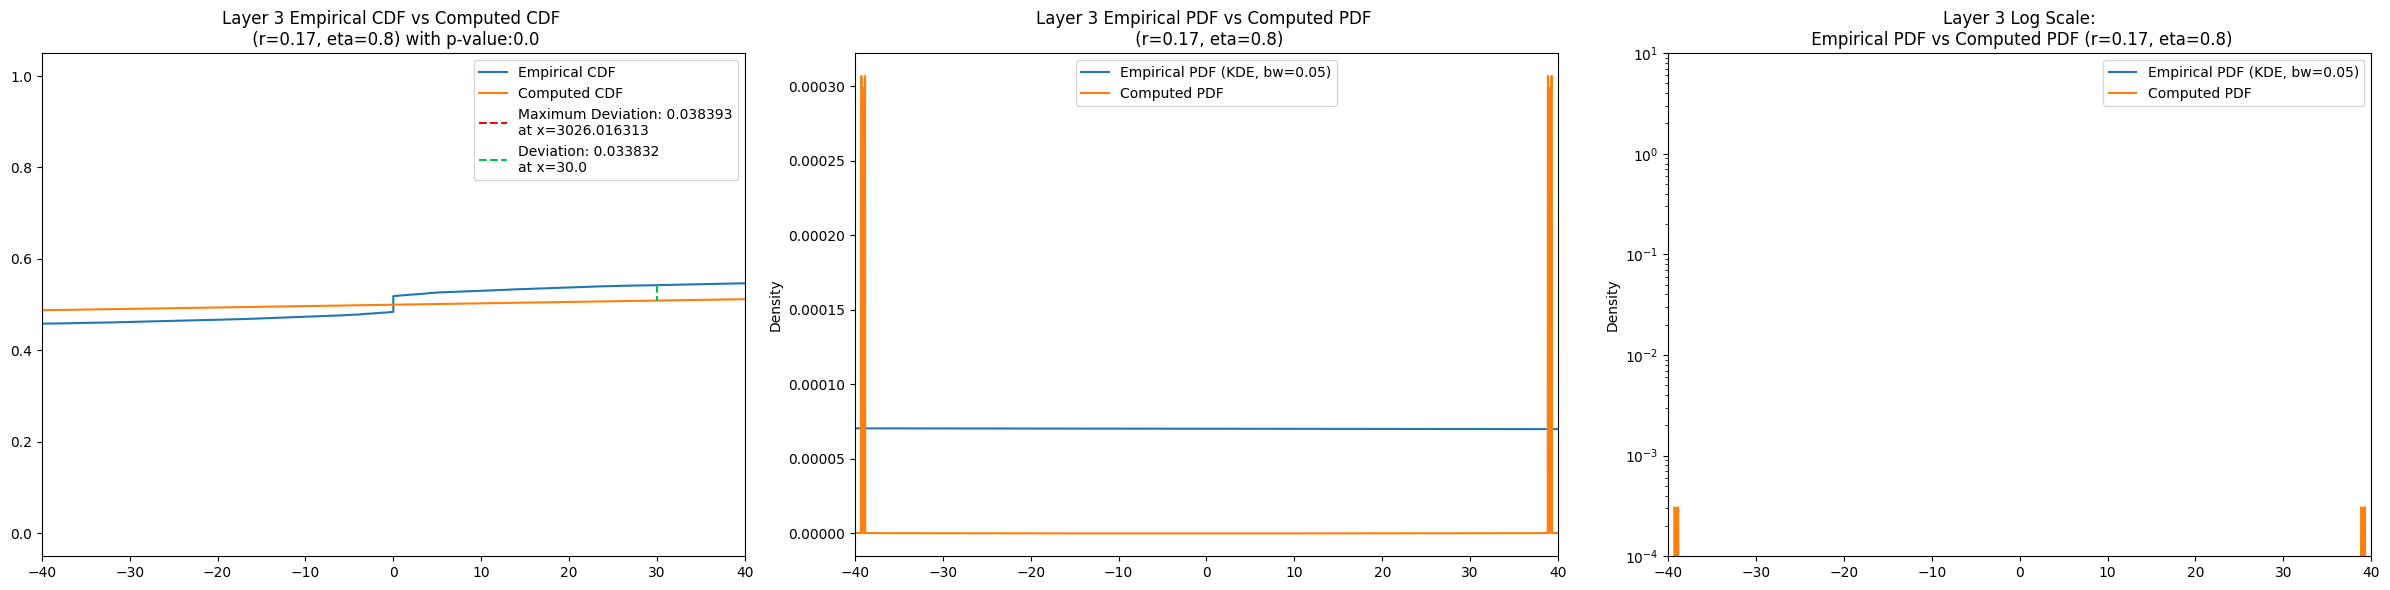

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:87: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:87: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


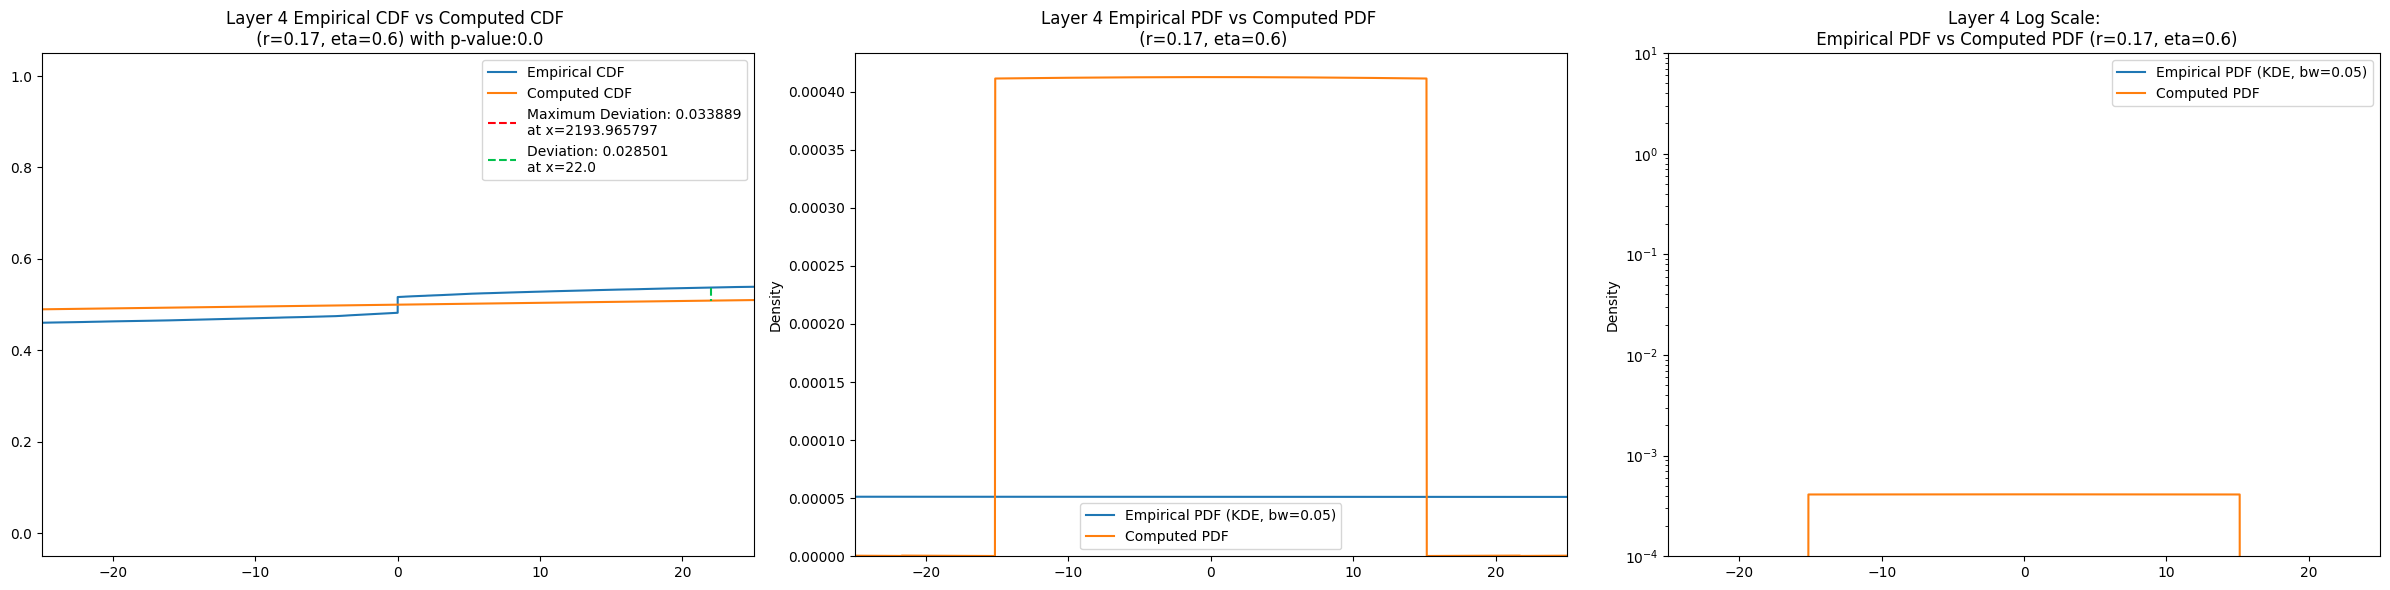

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:87: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


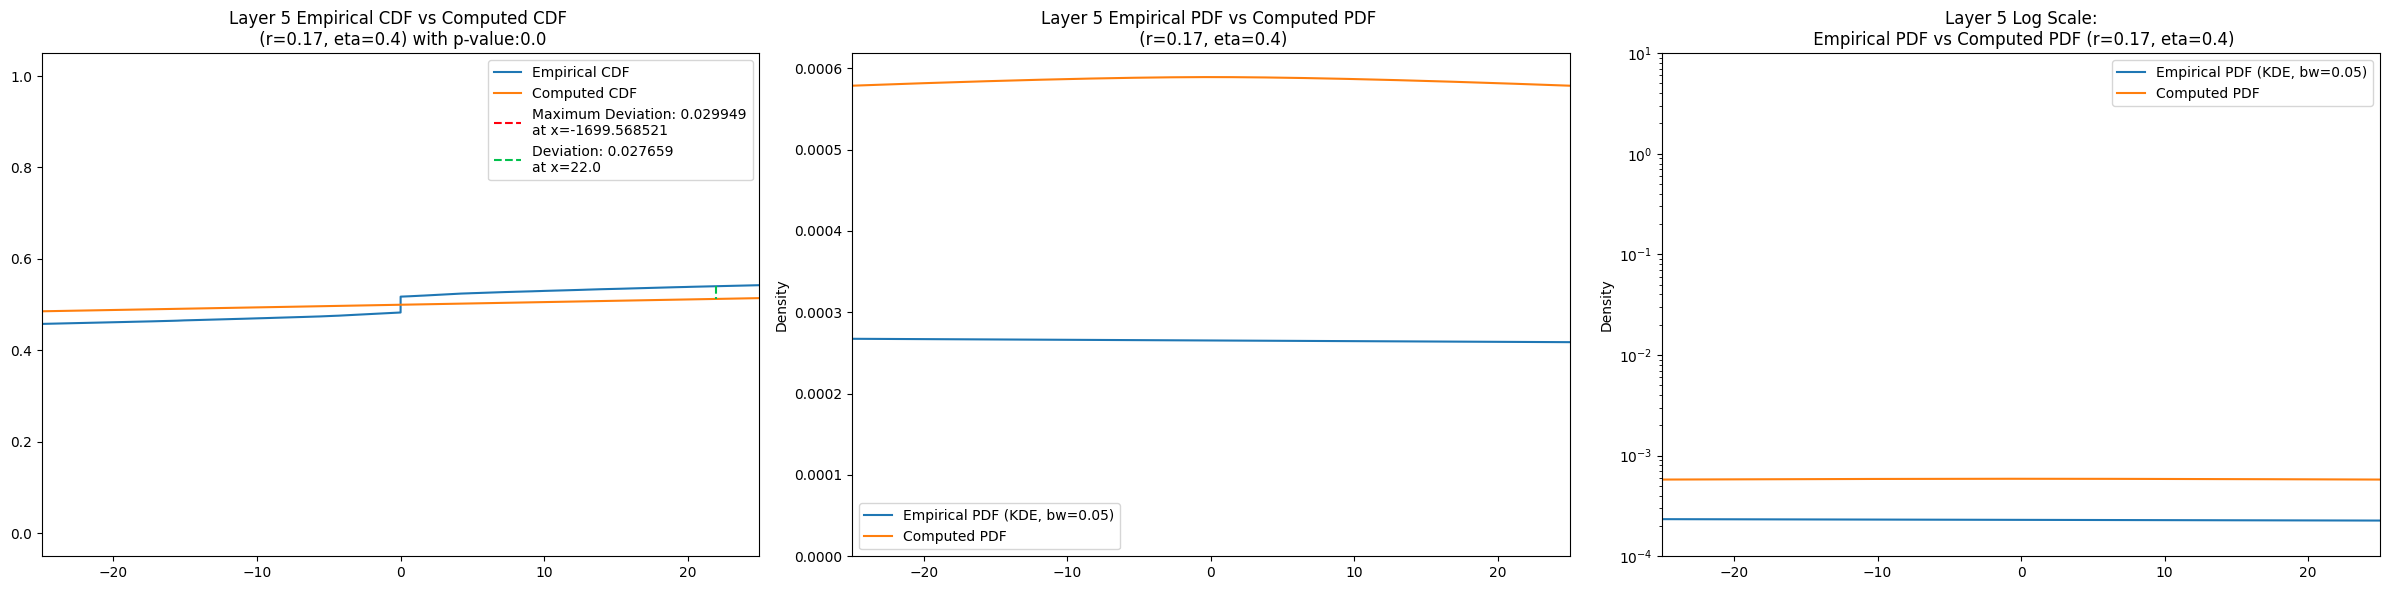

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:87: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


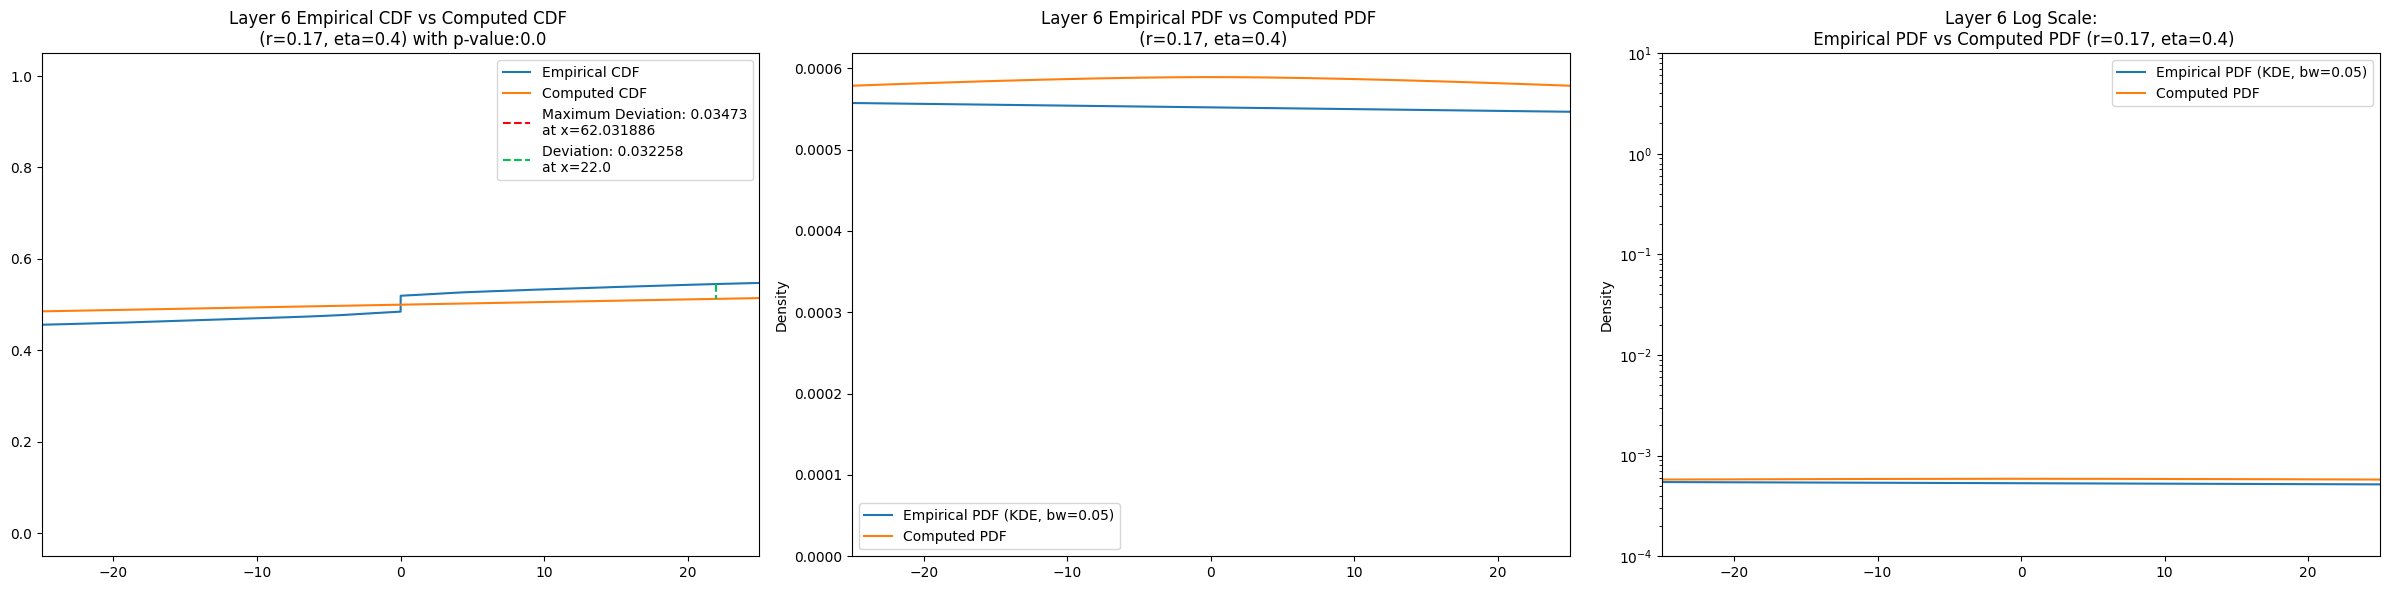

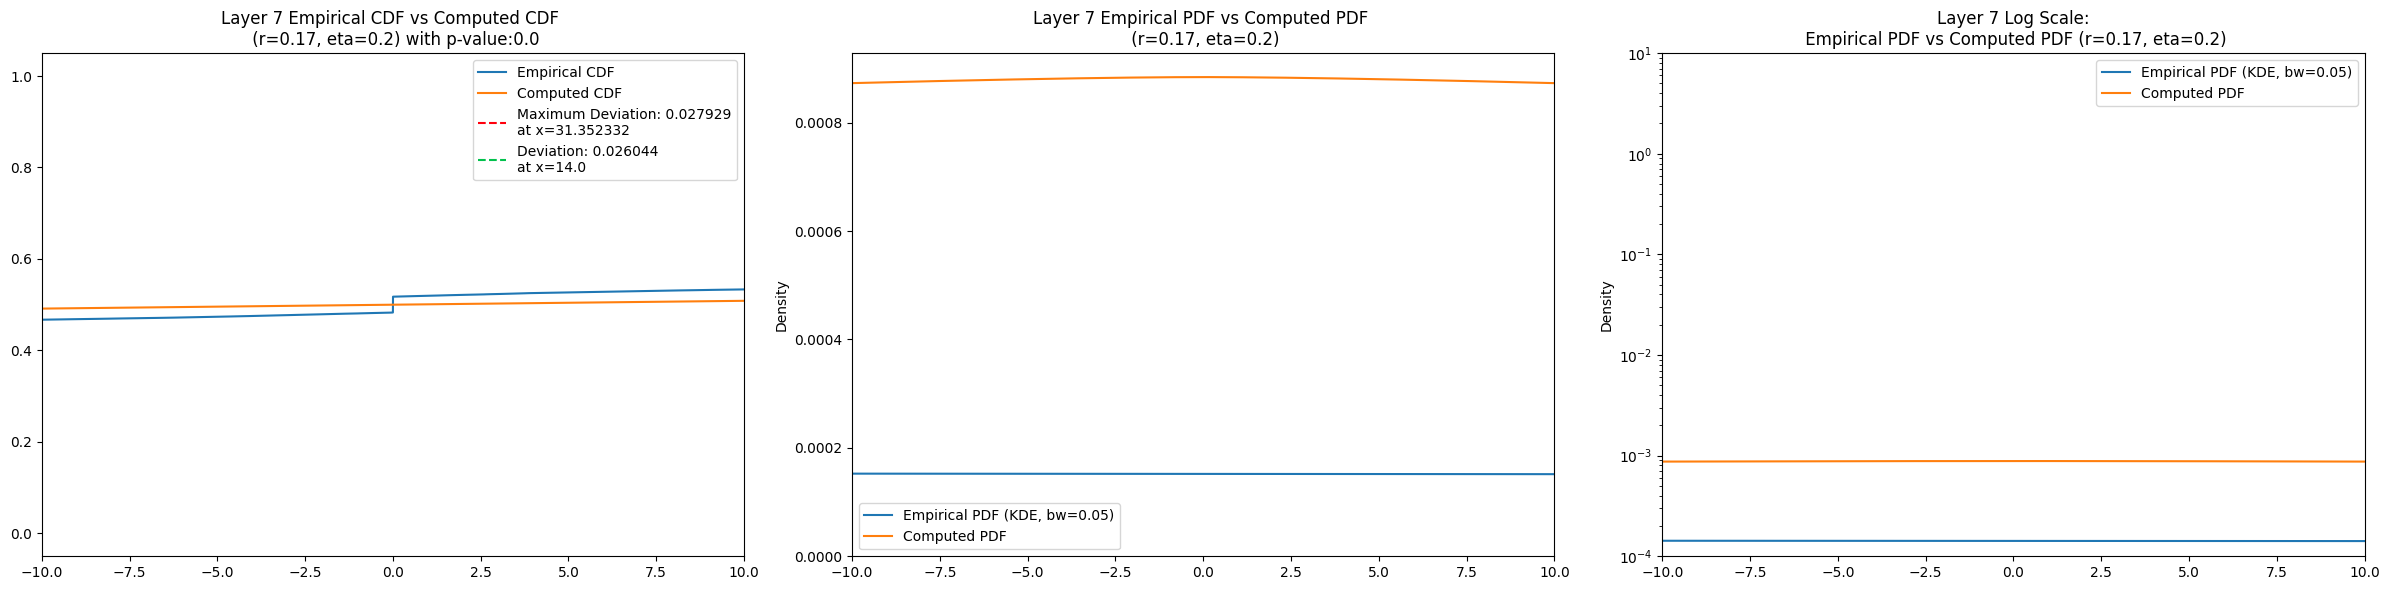

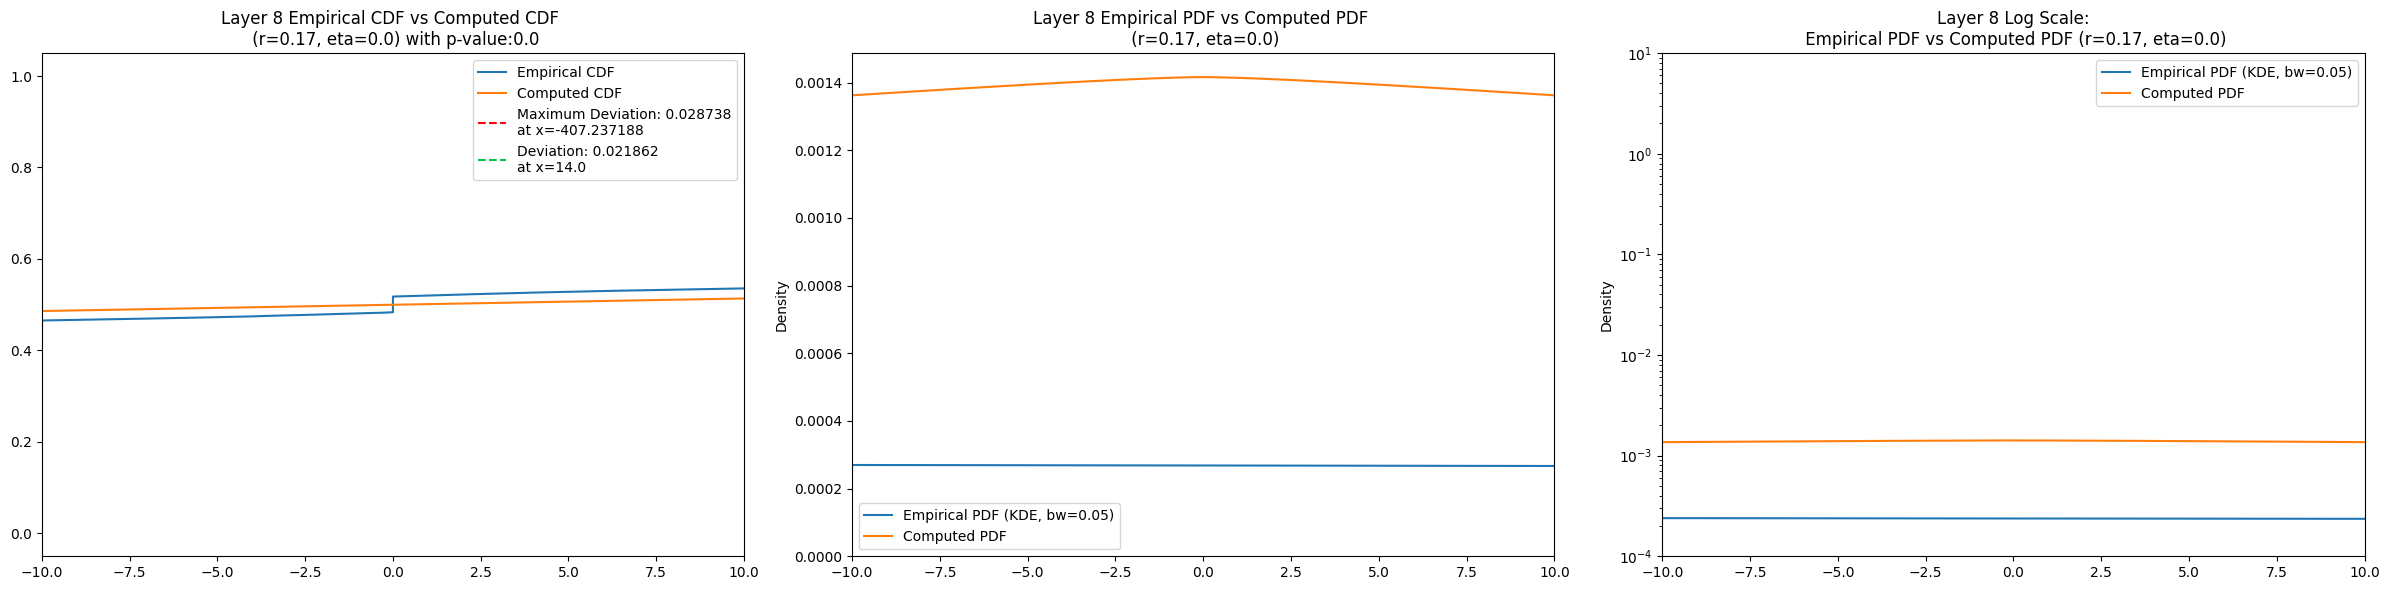

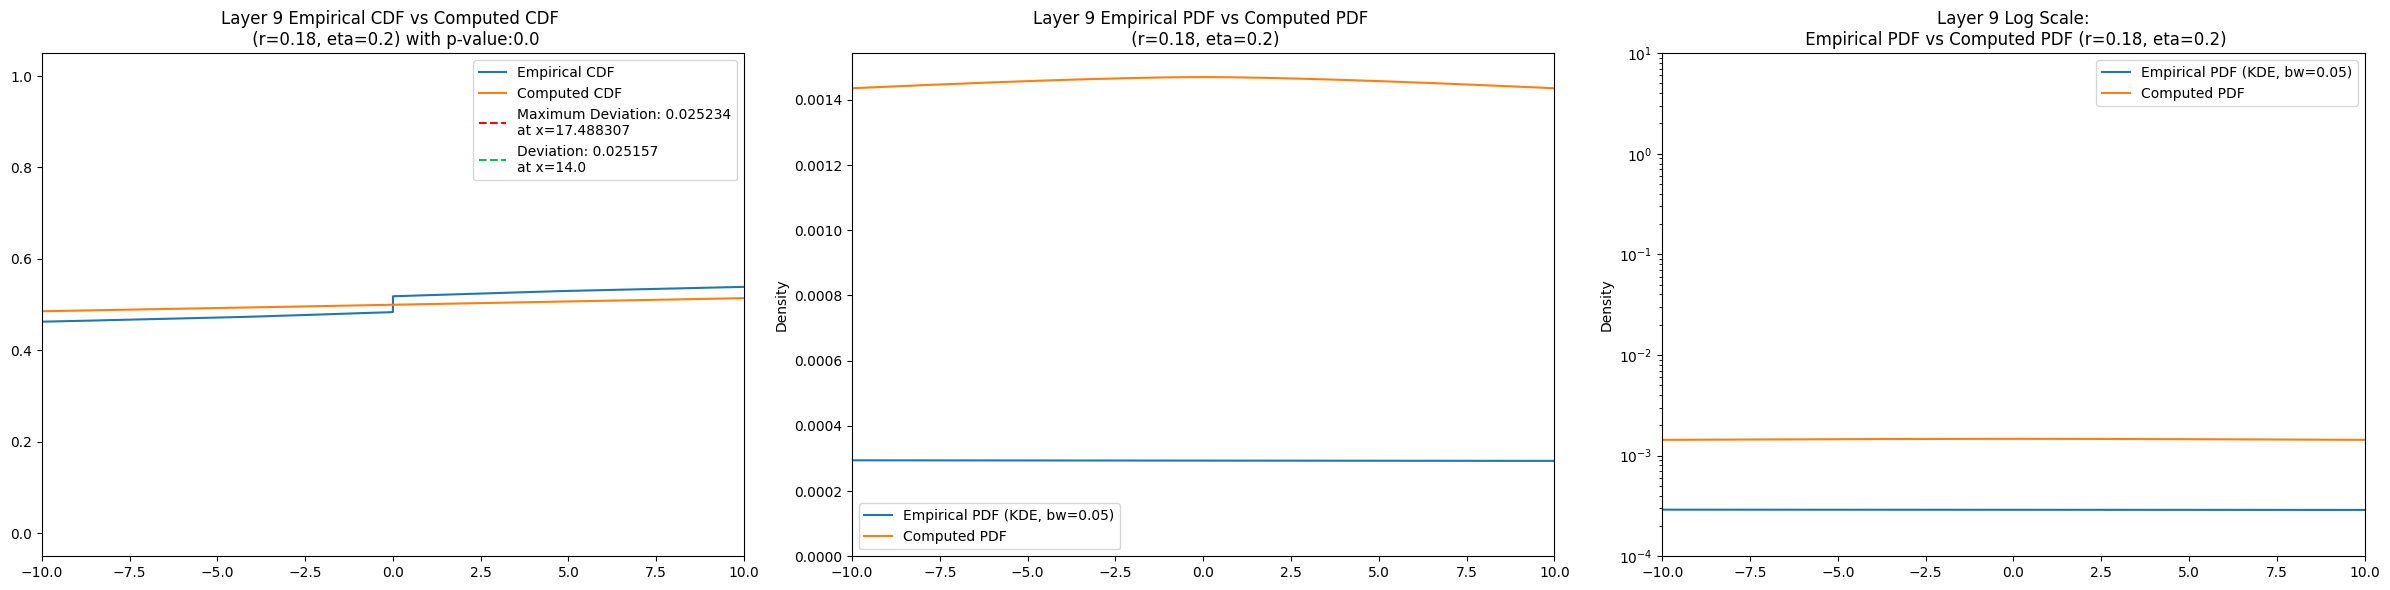

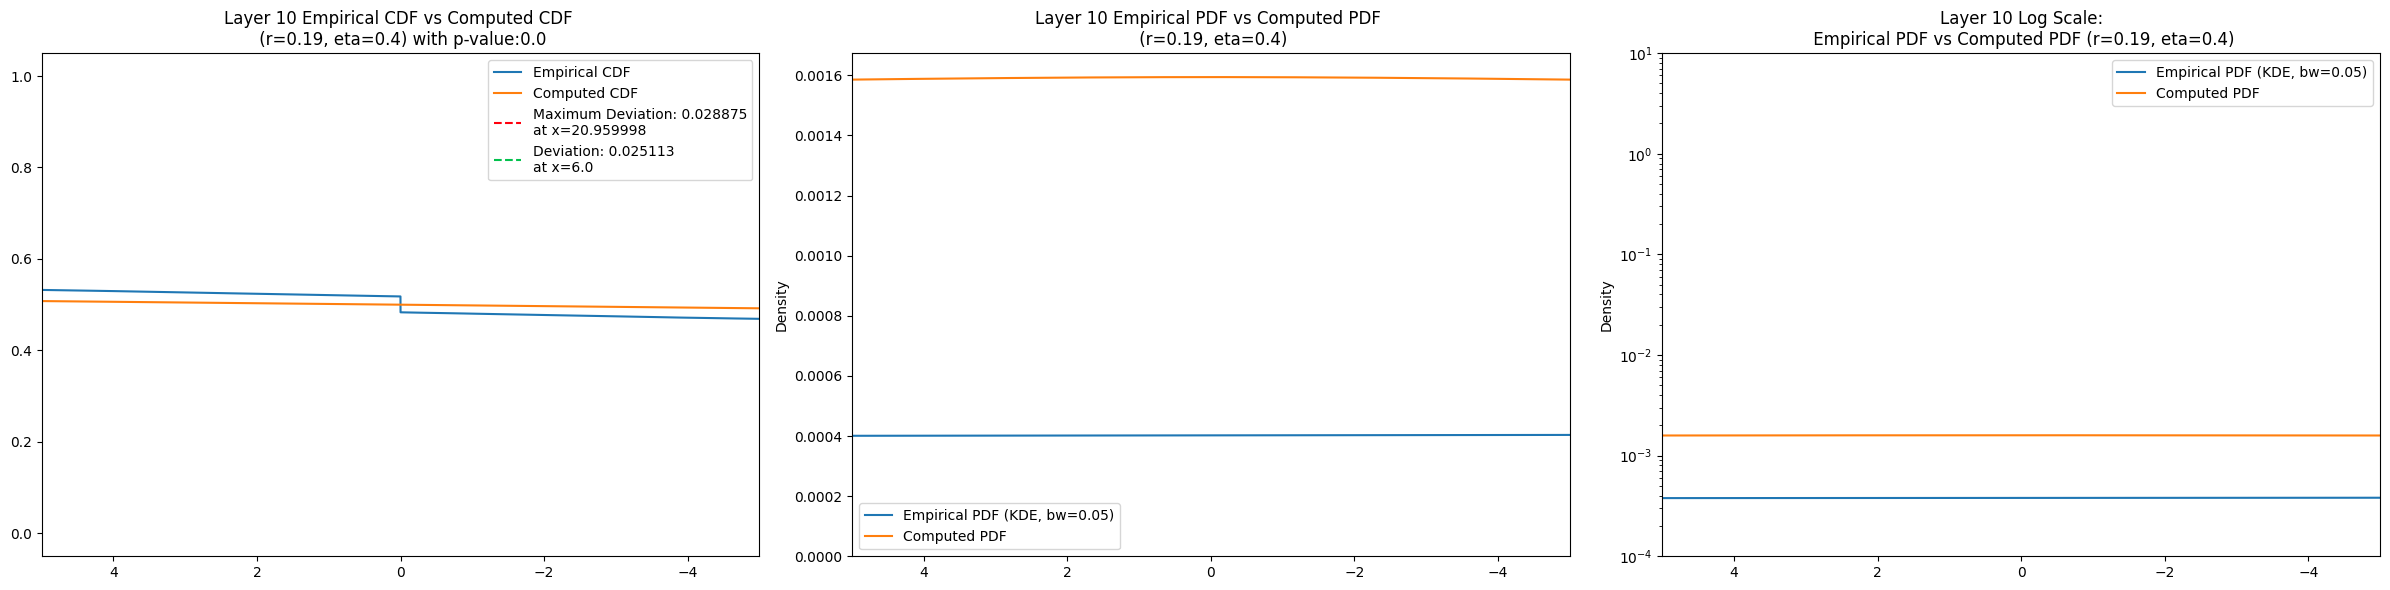

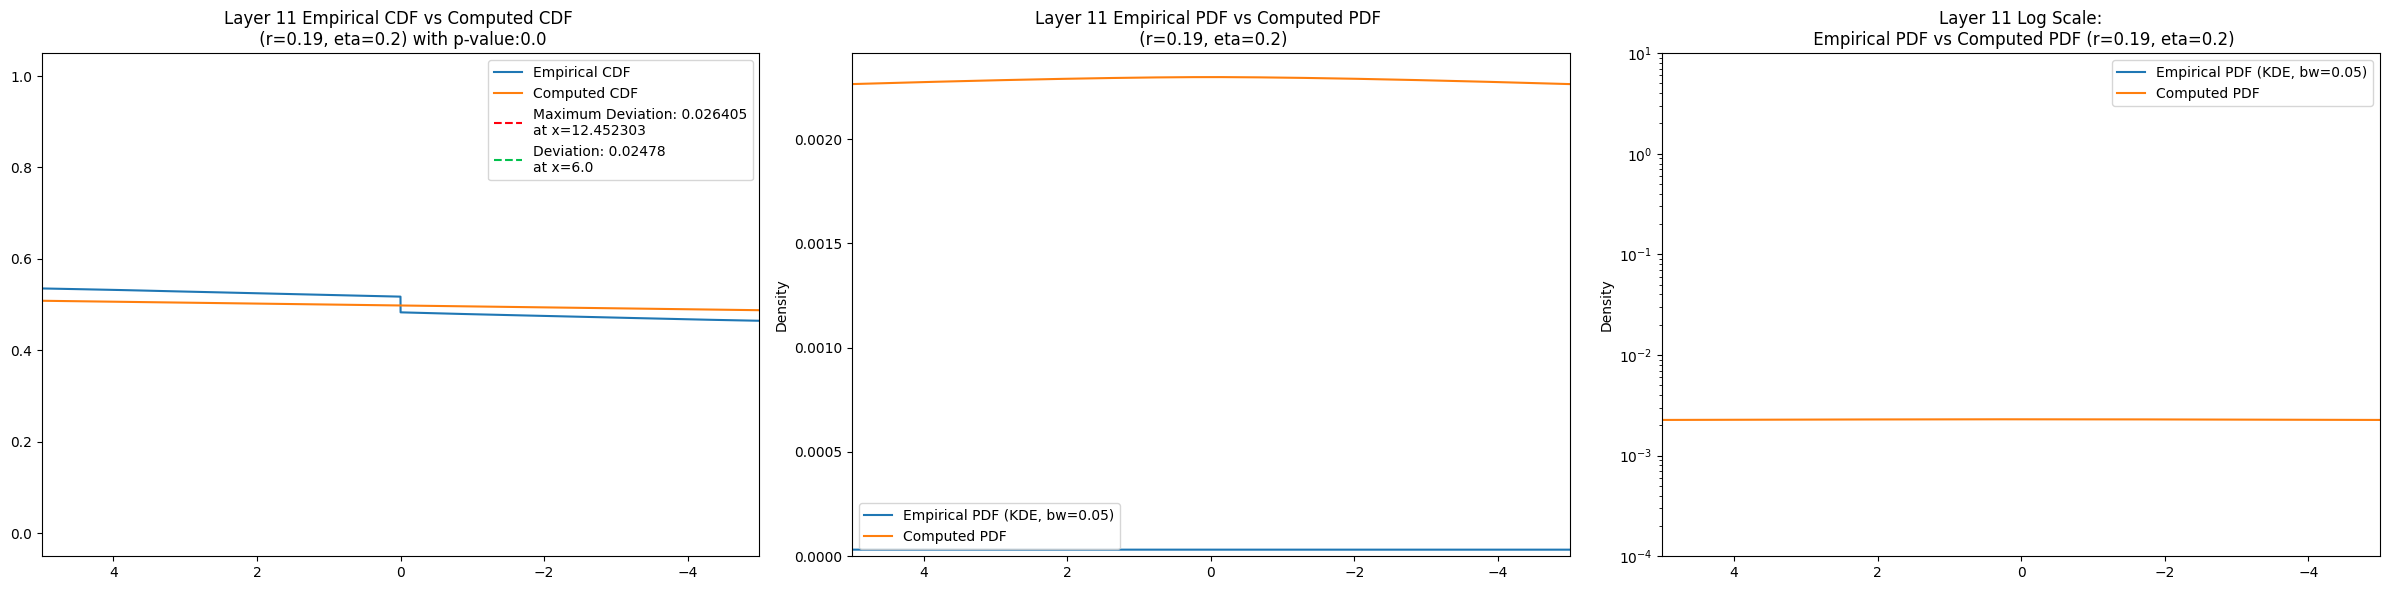

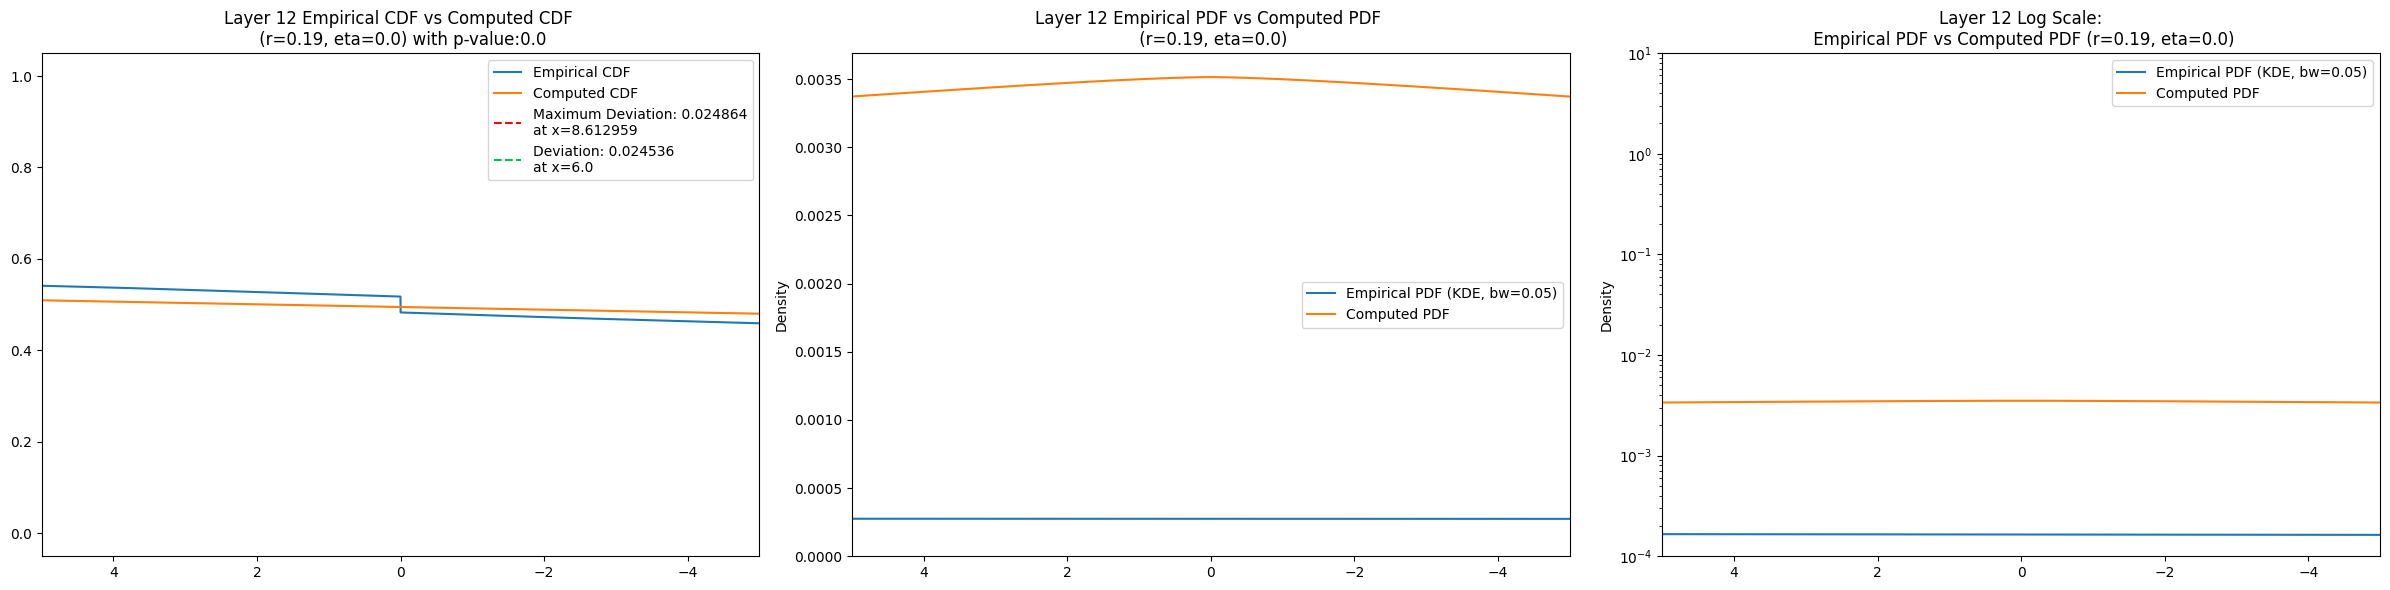

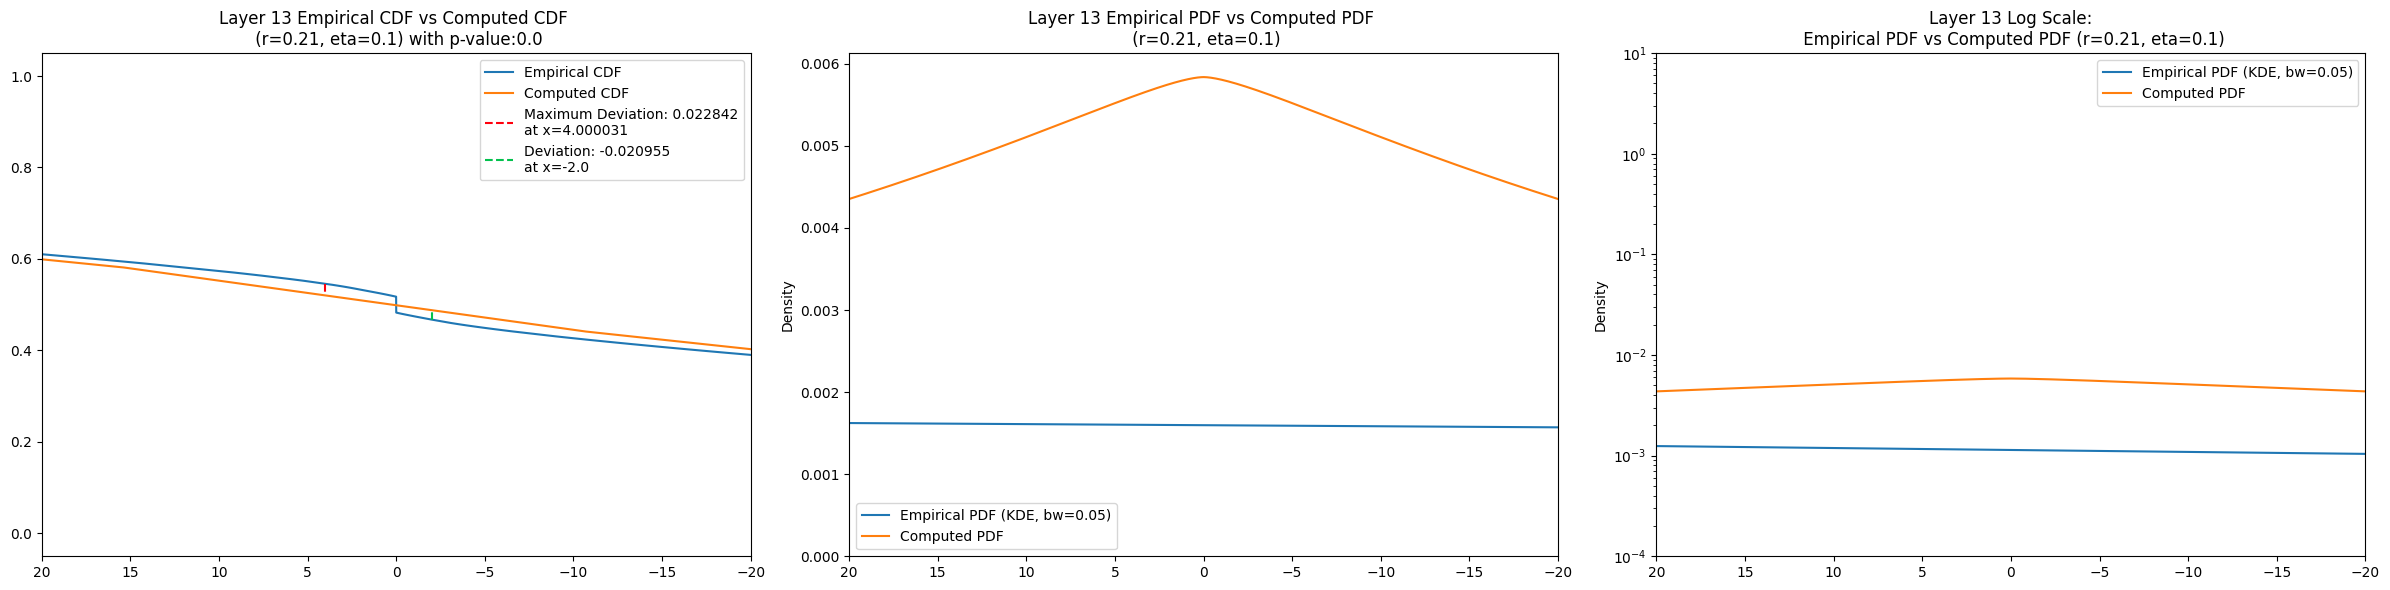

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/plot_utilities.py:332: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


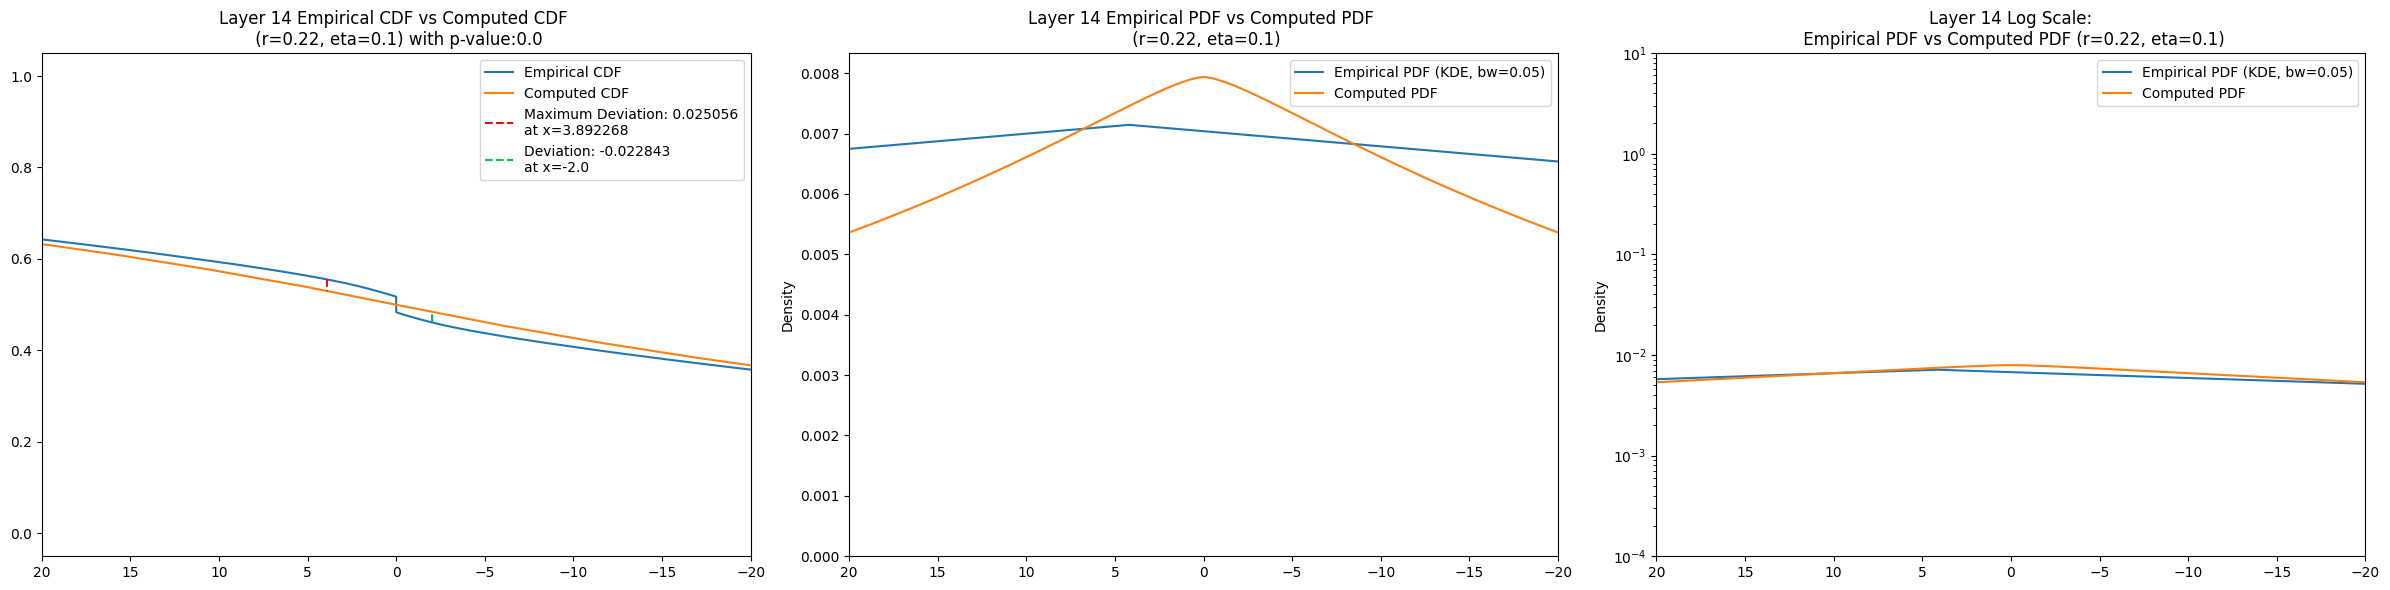

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_84349/378215499.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(f'{DATA_NAME}/plots/compare_cdf_pdf_layer_{group}.png', bbox_inches = 'tight')


In [24]:
for group in np.arange(min_group, max_group+1):
    group_info = master_df.loc[group]
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (group_info[f'best_r_d{r_d}'], group_info[f'best_eta_d{eta_d}']), 
                    log_scale = True,
                    all_cdfs = all_cdfs,
                    group = group,
                    interval = (-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(f'{DATA_NAME}/plots/compare_cdf_pdf_layer_{group}.png', bbox_inches = 'tight')

## Comparing with Gaussian and Laplace

In [30]:
SKIP_OPTIMIZE_STEP = True

def coord_descent_scipy(sample, initial_param):
    '''
    '''
    r_0, eta_0 = initial_param
    find_r_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_0), method = 'bounded', bounds = (max(0.5, r_0-0.1), r_0+0.1))
    r_1 = find_r_1['x']
    find_eta_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_eta', r_1), method = 'bounded', bounds = (max(0, eta_0-0.1), eta_0+0.1))
    eta_1 = find_eta_1['x']
    find_r_2 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_1), method = 'bounded', bounds = (max(0.5, r_1-0.1), r_1+0.1))

    r_2 = find_r_2['x']

    return r_2, eta_1, find_r_2['fun']

if SKIP_OPTIMIZE_STEP:
    master_df[f'best_r_scipy'], master_df[f'best_eta_scipy'], master_df[f'kstest_stat_cd_scipy'] =   master_df[f'best_r_d{r_d}'],  master_df[f'best_eta_d{eta_d}'], master_df['kstest_stat_initial']
else:
    for group in np.arange(min_group, max_group+1):
        master_df.loc[group, f'best_r_scipy'], master_df.loc[group, f'best_eta_scipy'], master_df.loc[group, f'kstest_stat_cd_scipy'] = coord_descent_scipy(group_data_map[group], master_df.loc[group, 'initial_param'])

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_cd_scipy.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_cd_scipy.csv', index_col = GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df


,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,n_pval_0.05,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
band,,,,,,,,,,,,,,,,,,,,,
2,26208,"(0.17, 1.2)",0.040712,"(0.17, 0)",0.235186,0.008383,0.040712,0.17,1.2,1164,...,50.0,0.437799,0.0,50.0,0.419973,0.0,50.0,0.401501,0.0,3.503950e-38
3,44352,"(0.17, 0.8)",0.038393,"(0.17, 0)",0.195514,0.006445,0.038393,0.17,0.8,1314,...,50.0,0.428775,0.0,50.0,0.408086,0.0,50.0,0.388572,0.0,3.058930e-57
4,80640,"(0.17, 0.6)",0.033889,"(0.17, 0)",0.163667,0.004780,0.033889,0.17,0.6,1593,...,50.0,0.418881,0.0,50.0,0.396454,0.0,50.0,0.376140,0.0,6.732880e-81
5,141120,"(0.17, 0.4)",0.029949,"(0.17, 0)",0.125488,0.003614,0.029949,0.17,0.4,2089,...,50.0,0.407614,0.0,50.0,0.381750,0.0,50.0,0.360653,0.0,2.124950e-110
6,258048,"(0.17, 0.4)",0.034730,"(0.17, 0)",0.097838,0.002673,0.034730,0.17,0.4,1512,...,50.0,0.398134,0.0,50.0,0.369761,0.0,50.0,0.347638,0.0,7.375480e-271
7,443520,"(0.17, 0.2)",0.027929,"(0.17, 0)",0.063644,0.002039,0.027929,0.17,0.2,2464,...,50.0,0.384439,0.0,50.0,0.352550,0.0,50.0,0.329952,0.0,5.513270e-301
8,838656,"(0.17, 0.0)",0.028738,"(0.17, 0)",0.028738,0.001483,0.028738,0.17,0.0,2329,...,50.0,0.369527,0.0,50.0,0.334440,0.0,50.0,0.311308,0.0,0.000000e+00
9,1505952,"(0.18, 0.2)",0.025234,"(0.17, 0)",0.026613,0.001107,0.025234,0.18,0.2,2941,...,50.0,0.351893,0.0,50.0,0.313973,0.0,50.0,0.290440,0.0,0.000000e+00
10,2735712,"(0.19, 0.4)",0.028875,"(0.18, 0)",0.033330,0.000821,0.028875,0.19,0.4,2251,...,50.0,0.329524,0.0,50.0,0.289033,0.0,50.0,0.265260,0.0,0.000000e+00


In [27]:
for group in np.arange(min_group, max_group+1):
    norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, 50))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, 50))
    t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, 50))
    
    master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

    master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

    master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
    master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
    master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

    master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'num_samples']).sf(min(master_df.loc[group, 'kstest_stat_cd'], master_df.loc[group, 'kstest_stat_cd_scipy'])), 6)

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_compare_priors.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_compare_priors.csv', index_col = GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,n_pval_0.05,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
band,,,,,,,,,,,,,,,,,,,,,
2,26208,"(0.17, 1.2)",0.040712,"(0.17, 0)",0.235186,0.008383,0.040712,0.17,1.2,1164,...,50.0,0.437799,0.0,50.0,0.419973,0.0,50.0,0.401501,0.0,3.503950e-38
3,44352,"(0.17, 0.8)",0.038393,"(0.17, 0)",0.195514,0.006445,0.038393,0.17,0.8,1314,...,50.0,0.428775,0.0,50.0,0.408086,0.0,50.0,0.388572,0.0,3.058930e-57
4,80640,"(0.17, 0.6)",0.033889,"(0.17, 0)",0.163667,0.004780,0.033889,0.17,0.6,1593,...,50.0,0.418881,0.0,50.0,0.396454,0.0,50.0,0.376140,0.0,6.732880e-81
5,141120,"(0.17, 0.4)",0.029949,"(0.17, 0)",0.125488,0.003614,0.029949,0.17,0.4,2089,...,50.0,0.407614,0.0,50.0,0.381750,0.0,50.0,0.360653,0.0,2.124950e-110
6,258048,"(0.17, 0.4)",0.034730,"(0.17, 0)",0.097838,0.002673,0.034730,0.17,0.4,1512,...,50.0,0.398134,0.0,50.0,0.369761,0.0,50.0,0.347638,0.0,7.375480e-271
7,443520,"(0.17, 0.2)",0.027929,"(0.17, 0)",0.063644,0.002039,0.027929,0.17,0.2,2464,...,50.0,0.384439,0.0,50.0,0.352550,0.0,50.0,0.329952,0.0,5.513270e-301
8,838656,"(0.17, 0.0)",0.028738,"(0.17, 0)",0.028738,0.001483,0.028738,0.17,0.0,2329,...,50.0,0.369527,0.0,50.0,0.334440,0.0,50.0,0.311308,0.0,0.000000e+00
9,1505952,"(0.18, 0.2)",0.025234,"(0.17, 0)",0.026613,0.001107,0.025234,0.18,0.2,2941,...,50.0,0.351893,0.0,50.0,0.313973,0.0,50.0,0.290440,0.0,0.000000e+00
10,2735712,"(0.19, 0.4)",0.028875,"(0.18, 0)",0.033330,0.000821,0.028875,0.19,0.4,2251,...,50.0,0.329524,0.0,50.0,0.289033,0.0,50.0,0.265260,0.0,0.000000e+00


# Examining Tail Behavior

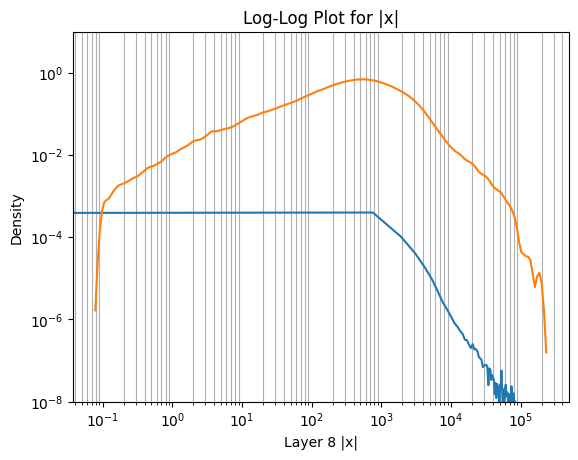

In [28]:
bw = 0.05
group = 7
x = np.abs(group_data_map[group])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {group} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')
plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_7.png', bbox_inches = 'tight')

bw = 0.05
group = 8
x = np.abs(group_data_map[group])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {group} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')
plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_8.png', bbox_inches = 'tight')


In [33]:
def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
    if metric_name == 'kstest_ratio':
        metric = compute_ksratio
    elif metric_name == 'kstest_stat':
        metric = compute_ksstat_tail

    for tail_cutoff in tail_cutoffs:
        metrics = []
        for layer in layers:
            if distro == 'gengamma':
                cdf = all_cdfs[master_df.loc[layer, 'initial_param']]
            elif distro == 'gaussian':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
            elif distro == 'laplace':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
            elif distro == 't':
                cdf = stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
            metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
        master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
for group in np.arange(min_group, max_group+1):
    add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(MIN_GROUP, MAX_GROUP+1))
    add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(MIN_GROUP, MAX_GROUP+1)) 
    add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(MIN_GROUP, MAX_GROUP+1))
    add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(MIN_GROUP, MAX_GROUP+1))
    add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(MIN_GROUP, MAX_GROUP+1))

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df.csv', index_col = GROUP)
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:296: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:296: RuntimeWarning: overflow encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:296: RuntimeWarning: divide by zero encountered in divide
  tail_ratios = np.nan_to_num(d[tail_idxs] / tail_vals)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:296: Runti

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta0,kstest_stat_cutoff_0.05,kstest_stat_cd,best_r_d2,best_eta_d1,n_pval_0.05,...,kstest_ratio_gengamma_tail0,kstest_ratio_gengamma_tail10,kstest_ratio_gaussian_tail0,kstest_ratio_gaussian_tail10,kstest_ratio_laplace_tail0,kstest_ratio_laplace_tail10,kstest_ratio_t_tail0,kstest_ratio_t_tail10,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
band,,,,,,,,,,,,,,,,,,,,,
2,26208,"(0.17, 1.2)",0.040712,"(0.17, 0)",0.235186,0.008383,0.040712,0.17,1.2,1164,...,"(-3.1662000000000017e+103, 9.976700000000004e+94)","(-3.1662000000000017e+103, 9.976700000000004e+94)","(0.56596, inf)","(0.56596, inf)","(0.56596, inf)","(0.56596, inf)","(0.59233, 21012.0)","(0.59233, 21012.0)",0.040712,0.040712
3,44352,"(0.17, 0.8)",0.038393,"(0.17, 0)",0.195514,0.006445,0.038393,0.17,0.8,1314,...,"(-5878300.0, 3.1059000000000003e+52)","(-5878300.0, 3.1059000000000003e+52)","(0.57507, inf)","(0.57507, inf)","(0.57507, inf)","(0.57507, inf)","(0.60485, 12674.0)","(0.60485, 12674.0)",0.038393,0.038393
4,80640,"(0.17, 0.6)",0.033889,"(0.17, 0)",0.163667,0.004780,0.033889,0.17,0.6,1593,...,"(-950930.0, 5.7244999999999995e+35)","(-950930.0, 5.7244999999999995e+35)","(0.57823, inf)","(0.57823, inf)","(0.57823, inf)","(0.57823, inf)","(0.61098, 5043.2)","(0.61098, 5043.2)",0.033889,0.033889
5,141120,"(0.17, 0.4)",0.029949,"(0.17, 0)",0.125488,0.003614,0.029949,0.17,0.4,2089,...,"(-189700.0, 5.4387e+24)","(-189700.0, 5.4387e+24)","(0.58986, inf)","(0.58986, inf)","(0.58986, inf)","(0.58986, inf)","(0.62583, 2153.9)","(0.62583, 2153.9)",0.029949,0.029949
6,258048,"(0.17, 0.4)",0.034730,"(0.17, 0)",0.097838,0.002673,0.034730,0.17,0.4,1512,...,"(-308820.0, 1.2671e+25)","(-308820.0, 1.2671e+25)","(0.60123, inf)","(0.60123, inf)","(0.60123, inf)","(0.60123, inf)","(0.64001, 1046.1)","(0.64001, 1046.1)",0.034730,0.034730
7,443520,"(0.17, 0.2)",0.027929,"(0.17, 0)",0.063644,0.002039,0.027929,0.17,0.2,2464,...,"(-798580.0, 1.5941e+18)","(-798580.0, 1.5941e+18)","(0.61161, inf)","(0.61161, inf)","(0.61161, inf)","(0.61161, inf)","(0.6537, 542.57)","(0.6537, 542.57)",0.027929,0.027929
8,838656,"(0.17, 0.0)",0.028738,"(0.17, 0)",0.028738,0.001483,0.028738,0.17,0.0,2329,...,"(-28573.0, 13383000000.0)","(-28573.0, 13383000000.0)","(0.62532, inf)","(0.62532, inf)","(0.62532, inf)","(0.62532, inf)","(0.67021, 243.75)","(0.67021, 243.75)",0.028738,0.028738
9,1505952,"(0.18, 0.2)",0.025234,"(0.17, 0)",0.026613,0.001107,0.025234,0.18,0.2,2941,...,"(-18525.0, 28946000000.0)","(-18525.0, 28946000000.0)","(0.64319, inf)","(0.64319, inf)","(0.64319, inf)","(0.64319, inf)","(0.6913, 130.21)","(0.6913, 130.21)",0.025234,0.025234
10,2735712,"(0.19, 0.4)",0.028875,"(0.18, 0)",0.033330,0.000821,0.028875,0.19,0.4,2251,...,"(-279500.0, 4872500000000.0)","(-279500.0, 4872500000000.0)","(0.66356, inf)","(0.66356, inf)","(0.66356, inf)","(0.66356, inf)","(0.71477, 85.593)","(0.71477, 85.593)",0.028875,0.028875


# Results

In [ ]:
#master_df.filter(regex='num_samples|kstest_stat.*')
#master_df.filter(regex='num_samples|param.*')
# master_df.filter(regex='.*gaussian')
master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,kstest_stat_initial,kstest_stat_eta0,kstest_stat_cutoff_0.05,kstest_stat_cd_scipy,kstest_stat_gaussian,kstest_stat_laplace,kstest_stat_t,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,
2,0.021670,0.060374,0.024030,0.021670,0.019503,0.036392,0.036305,0.021670,2.166960e-02
3,0.008143,0.037031,0.012029,0.008143,0.010128,0.022665,0.026410,0.008143,8.143188e-03
4,0.006270,0.023245,0.006018,0.006270,0.020474,0.014498,0.018489,0.005811,5.486526e-03
5,0.005235,0.005645,0.003010,0.005235,0.030175,0.002343,0.010572,0.003321,1.373036e-03
6,0.020505,0.020505,0.001505,0.020505,0.042370,0.014477,0.017937,0.019262,8.376645e-04
7,0.082279,0.082279,0.000753,0.082279,0.052925,0.025277,0.026436,0.016792,2.426051e-05
8,0.227356,0.227356,0.000376,0.227356,0.056353,0.029150,0.028144,0.006479,7.677378e-07
